In [1]:
#출처: https://github.com/seohl16
#출처에서 가져온 코드를 바탕으로 이해가 쉽도록 주석을 달았습니다


# Reference : https://github.com/Manu-Fraile/Network-Representation-Learning/blob/master/DeepWalk/main.py
# https://github.com/rlagywns0213/2021_Summer_Internship/blob/main/Graph%20Neural%20Network/RandomWalk/Deepwalk/train.py
# sg parameter if 1 skip gram for Word2Vec https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# hs parameter if 1 hierarchical softmax


In [2]:
import networkx as nx # https://networkx.org/documentation/stable/tutorial.html
import numpy as np
import random
import argparse
import pickle
import torch
from gensim.models import Word2Vec # https://radimrehurek.com/gensim/

In [3]:
class DeepWalk(torch.nn.Module):
    def __init__(self, G, w= 10, d = 2, gamma = 20, t = 6):
      super(DeepWalk, self).__init__()
      # 수도코드 상 Grpah, Window size, Embedding size, Walks per vertex, Walk length를 정의해야함
      self.G = G            # Graph
      self.w = w            # Window Size
      self.d = d            # Embedding size
      self.gamma = gamma    # Walks per vertex
      self.t = t            # Walk Length
      self.embedding = None



    def randomWalk(self, st_v):
    # Random Walk: 그래프에서 Sequence를 생성하는 역할
      one_walk = []
      current_node = st_v
      one_walk.append(str(st_v))                 # 현재 노드부터 시작
      for j in range(self.t - 1):                # Walk의 Length를 설정
        neighbors = list(G.edges([st_v]))
        if (len(neighbors) > 0):
          random_edge = random.choice(neighbors) # random.choice는 인접 노드의 리스트 형태
          if (random_edge[0] == current_node):
            current_node = random_edge[1]        # 같지 않은 노드로 Sequence를 만들기 위해
          else :
            current_node = random_edge[0]
        one_walk.append(str(current_node))
      return one_walk                            # Sequence를 return



    def train(self):
      walks = []
      nodes = list(G.nodes())                    # .nodes는 networkx 패키지 내에 존재
      print('starting', len(self.G.nodes))
      for i in range(self.gamma):
        random.shuffle(nodes)
        for node in nodes:
          walks.append(self.randomWalk(node))
      # print(len(walks)) # gamma * t

      # Word2Vec은 Skip-gram 역할
      # Skip-gram: 임베딩 학습
      skipgrammodelresult = Word2Vec(walks, vector_size=self.d, window=self.w, sg=1, hs=1)
      self.embedding = skipgrammodelresult
      return self.embedding

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 21, 25, 23, 24, 27, 28, 29, 26, 30, 31, 32, 14, 15, 18, 20, 22, 33]


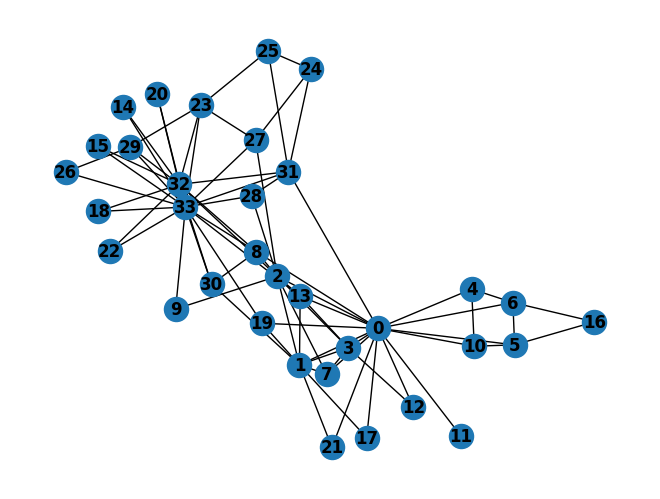

In [4]:
#networx 패키지를 이용하여 그래프 생성

my_graph = nx.Graph()

# Edge 표현 : (1,0), 1번 노드와 0번 노드 연결
edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
        (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
        (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
        (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
        (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
        (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
        (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
        (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
        (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
        (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
        (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
        (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
        (33, 31), (33, 32)]

my_graph.add_edges_from(edge_list)

# Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')
G = my_graph
print(list(G.nodes()))

In [5]:
# Grpah, Window size, Embedding size, Walks per vertex, Walk length를 Class로 정의
w = DeepWalk(G, 5, 2, 100, 5)

In [6]:
embedding = w.train()

starting 34


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_coords = []
y_coords = []
word_vectors = [w.embedding.wv[v] for v in w.embedding.wv.key_to_index.keys()]
pca = PCA(n_components=2)
edge_list = w.embedding.wv

In [8]:
w.embedding.wv.key_to_index.keys()

dict_keys(['33', '0', '32', '1', '2', '6', '3', '31', '5', '23', '29', '27', '24', '25', '10', '4', '8', '30', '16', '7', '13', '28', '26', '19', '17', '12', '21', '22', '9', '18', '20', '15', '14', '11'])

In [9]:
edge_list = ['33', '0', '32', '1', '2', '3', '31', '5', '6', '23', '29', '24', '10', '4', '27', '25', '8', '13', '16', '30', '7', '26', '28', '12', '19', '17', '21', '18', '14', '9', '22', '15', '20', '11']

Text(0.5, 1.0, 'Representations of Karate Graph')

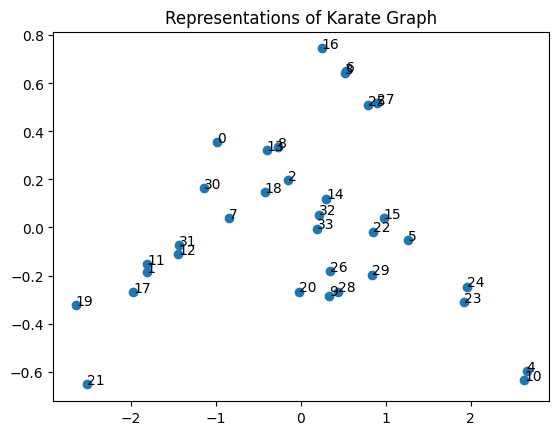

In [10]:
pca_result = pca.fit_transform(word_vectors)
for x,y in pca_result:
    x_coords.append(x)
    y_coords.append(y)
plt.scatter(x_coords, y_coords)
for i,v in enumerate(edge_list):
    plt.annotate(v,xy=(x_coords[i],y_coords[i]))
plt.title("Representations of Karate Graph")

In [11]:
pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.17.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c